In [3]:
import csv
import numpy as np
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.model_selection import cross_validate
import pandas as pd
import datetime as dt
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#read a file
#インデックスをTIMESTANPに設定し，時系列データとして読み込む(index_col='TIMESTAMP', parse_dates=True)
df = pd.read_csv('Fukadani201607to201711.csv', index_col='TIMESTAMP', parse_dates=True)
df = df.dropna(how='any')
print(df.head())
# print(df)
# print(df.dtypes)

                     Unnamed: 0    RECORD  Bat_Avg  Pit_WL_Avg  L_UR_Avg  \
TIMESTAMP                                                                  
2016-06-01 00:03:00           0  369472.0    12.66       77.07     336.4   
2016-06-01 00:04:00           1  369473.0    12.66       77.07     336.4   
2016-06-01 00:05:00           2  369474.0    12.66       77.09     336.3   
2016-06-01 00:06:00           3  369475.0    12.66       77.08     336.5   
2016-06-01 00:07:00           4  369476.0    12.66       77.06     336.5   

                     L_UL_Avg  L_DR_Avg  L_DL_Avg  Load_Avg  \
TIMESTAMP                                                     
2016-06-01 00:03:00     274.8     392.3     433.6    1437.0   
2016-06-01 00:04:00     274.8     392.2     433.7    1437.0   
2016-06-01 00:05:00     274.7     392.2     433.6    1437.0   
2016-06-01 00:06:00     274.8     392.3     433.6    1437.0   
2016-06-01 00:07:00     274.9     392.3     433.7    1437.0   

                     Load

In [5]:
# moving averages
#Setting a rate of moving averages
mavgs = 30
df_movingav_30 = df.rolling(mavgs,min_periods=int(mavgs-2) ).mean()
# print(df_movingav_30)
# NaNデータを削除
df1_movingav_30 = df_movingav_30.dropna(how='any')
# print(df1_movingav_30)

In [6]:
#Take a 30 min mean of every colom
df_mean_30 = df.asfreq('30T')
# print(df_mean_30)

In [7]:
# NaNデータを削除
df1_mean_30 = df_mean_30.dropna(how='any')

In [8]:
#df.columnsを全部表示させるようにする
pd.options.display.max_seq_items = 200
#print
print(df_mean_30.columns)
#pd.options.display.max_seq_itemsを元にもどす(初期値が２０だった)
pd.options.display.max_seq_items = 20

Index(['Unnamed: 0', 'RECORD', 'Bat_Avg', 'Pit_WL_Avg', 'L_UR_Avg', 'L_UL_Avg',
       'L_DR_Avg', 'L_DL_Avg', 'Load_Avg', 'Load_Avg_difference', 'WL_up_Avg',
       'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg',
       'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)',
       'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg', 'hp_Tot(7)', 'hp_Tot(8)',
       'hp_Tot(9)', 'hp_Tot(10)'],
      dtype='object')


In [9]:
#Determine which DataFrame you are gonna use
# df_fin = df1_mean_30
df_fin = df1_movingav_30

In [10]:
#Choose data we are gonna use
#YOU SHOULD CHANGE HERE IF YOU WANNA SELECT DIFFERENT INPUT DATA OR ADD SOME DATA AS INPUTS
# y_cols has to be 'Load_Avg_difference'
y_cols = ['Load_Avg_difference']

#ALL
X_cols = [ 'WL_up_Avg',
       'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg',
       'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)',
       'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg', 'hp_Tot(7)', 'hp_Tot(8)',
       'hp_Tot(9)', 'hp_Tot(10)']

X = df_fin[X_cols]
y = df_fin[y_cols]
# #     X.rolling(window=5).mean()
#     y.rolling(window=5).mean()



In [11]:
#Cut data where pit weigh < 1000?500?
df_fin['Load_Avg'] = df_fin['Load_Avg'].values.astype('float')
df_cut1 = df_fin[(df_fin['Load_Avg'] > 200)&(df_fin['Load_Avg'] < 1300)]

# Cut data where pit load difference is out of margin of error
df_cut2 = df_cut1[(df_cut1['Load_Avg_difference'] < 20)&(df_cut1['Load_Avg_difference'] > -0.5)]

df_cut3 = df_cut2[~((df_cut1['Load_Avg_difference'] > 5)&(df_cut1['hp_Tot(6)'] < 50))]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [12]:
X = df_cut3[X_cols].values.astype('float')
y = df_cut3[y_cols].values.astype('float')

In [13]:
#Devide data into Training set and test set
#In Machine Learning course of coursera, I learned that I have to devide the data set into Training set, Cross calidation set,Test set.
#But in this case I'll just follow the code that I found online. Probably I'll have to fix this part once I get to know much more about Machine Learning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_ori_train = X_train
X_ori_test = X_test
y_ori_train = y_train
y_ori_test = y_test

In [14]:
# train the parameters with regression model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(100)
# n_estimators : integer, optional (default=10)
# The number of trees in the forest.

model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
#Score
#coefficient of determination R^2 

print(model.score(X_test,y_test))

0.9591210059517169


In [16]:
# #Score without the data where there's no events happning
#Delete data of when the pit gets cleared 

df_y_test = pd.DataFrame(y_test)
df_y_test.columns = y_cols
df_X_test = pd.DataFrame(X_test)
df_X_test.columns = X_cols

df_yX_test = pd.concat([df_y_test, df_X_test], axis=1)

df_yX_test_del = df_yX_test[(df_yX_test['Load_Avg_difference'] < 20)&(df_yX_test['Load_Avg_difference'] > 1)]
X_test_del = df_yX_test_del[X_cols].values.astype('float')
y_test_del = df_yX_test_del[y_cols].values.astype('float')



print("Score ,when y>1")
print(model.score(X_test_del,y_test_del))
print("The number of the data where y > 1 ", "is " ,len(y_test_del))

Score ,when y>1
0.983720603267619
The number of the data where y > 1  is  405


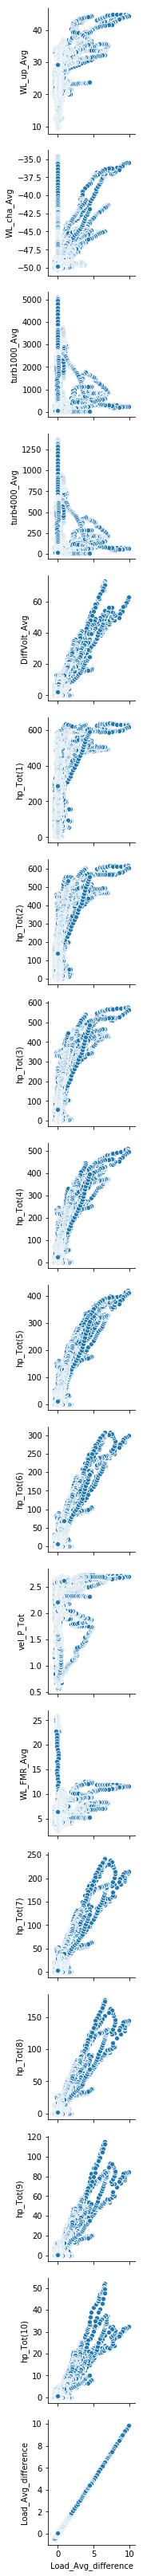

In [17]:
# 「散布図行列」を作成する。散布図行列を利用すれば、データセットの特徴量のペアに対す
# る相関関係を1 つの平面上で可視化可能
import matplotlib.pyplot as plt
import seaborn as sns
Xy_cols = X_cols + y_cols
df_f = df_cut3[Xy_cols].astype('float')
sns.pairplot(df_f[Xy_cols],x_vars=['Load_Avg_difference'], y_vars= Xy_cols, height=2.5)

#グラフを保存するときは描画させない
plt.show()
# plt.savefig('figure(LADandOthers).png')

In [18]:
#Sometimes this def takes so much time to implement if input data is large.
def time_series_graph_of_two_inputs(input1, input2, label1, label2):
    fig, ax1 = plt.subplots()

    #x軸
    s=df_cut2.index

    #主軸に出来高の棒グラフ
    ax1.bar(s,df_cut2[input1], color = 'g')

    #主軸と2軸の関連づけ
    ax2=ax1.twinx()

    #第2軸に株価
    ax2.plot(s,df_cut2[input2],'r', label = 'label2')

    # 描画の調整
    plt.rcParams['font.size'] = 8
    plt.ylabel(label1)
    plt.legend()
    # plt.savefig('compiration_LADandHP(1).png')
    plt.show()

In [19]:
# time_series_graph_of_two_inputs(input1='hp_Tot(6)',input2='Load_Avg_difference',label1='pulses',label2='kg')

1   hp_Tot(5)   0.5883640513080148
2   hp_Tot(6)   0.1623148892125505
3   hp_Tot(3)   0.07090926274816106
4   hp_Tot(4)   0.022341110677931278
5   turb1000_Avg   0.01916006680509273
6   turb4000_Avg   0.018624998825717495
7   WL_cha_Avg   0.018352566670980293
8   hp_Tot(7)   0.017816740184798893
9   vel_P_Tot   0.01716856675484976
10   WL_up_Avg   0.016602684021532043
11   WL_FMR_Avg   0.013437843918120123
12   hp_Tot(1)   0.008730612229012473
13   hp_Tot(2)   0.008511202506765646
14   DiffVolt_Avg   0.007972715773394711
15   hp_Tot(10)   0.004259854096806606
16   hp_Tot(9)   0.0032342483255494965
17   hp_Tot(8)   0.0021985859407221394


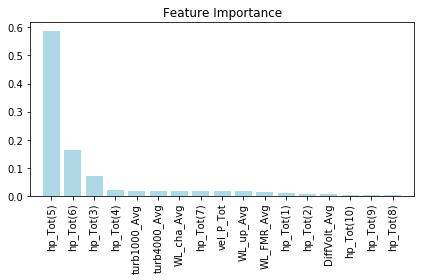

In [20]:
#
feature = model.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.loc[:, 'number']

#Name of the features
dfX = pd.DataFrame(X)
dfX.columns = X_cols
label = dfX.columns[0:]

#arrange the features in order of importance
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print( str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

          
import matplotlib
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()